In [1]:
%matplotlib inline
morange = u'#ff7f0e'
mblue = u'#1f77b4'
mgreen = u'#2ca02c'
mred = u'#d62728'
mpurple = u'#9467bd'
from matplotlib import pyplot as plt
import numpy as np 
__=plt.style.use('~/aph.mplstyle')

In [2]:
def f(x, a=3, b=2, c=1):
    return a*np.cos(b*x+c)

def df_dx(x, a=3, b=2, c=1):
    return -a*b*np.sin(b*x+c)

In [3]:
from GPy.kern import RBF
from GPy.models import GPRegression

npts = 200
x = np.linspace(-3, 3, npts)
y = np.random.normal(loc=f(x), scale=0.5)

kernel = RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPRegression(x.reshape(-1, 1), y.reshape(-1, 1),kernel)


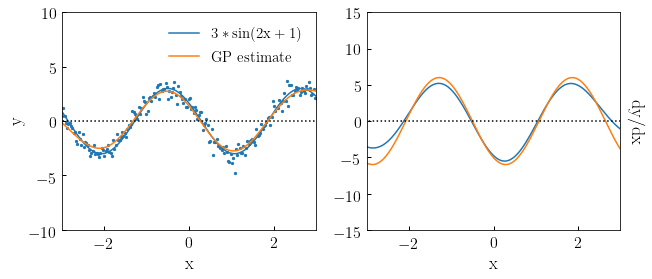

In [4]:
s = np.sort(np.random.uniform(-3, 3, 1000))
z = m.predict(s.reshape(-1, 1))[0]

dmu_dX, dv_dX = m.predictive_gradients(s.reshape(-1, 1))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
__=ax1.scatter(x, y, s=5)

__=ax1.plot(s, f(s), label=r'${\rm 3*sin(2x+1)}$')
__=ax1.plot(s.flatten(), z.flatten(), label=r'${\rm GP\ estimate}$')

__=ax2.plot(s, dmu_dX[:, -1, -1])
__=ax2.plot(s, df_dx(s))

xlabel = ax1.set_xlabel(r'${\rm x}$')
xlabel2 = ax2.set_xlabel(r'${\rm x}$')
ylabel = ax1.set_ylabel(r'${\rm y}$')

__=ax2.yaxis.set_label_position("right")
ylabel2 = ax2.set_ylabel(r'${\rm dy}/{\rm dx}$', rotation=-90, labelpad=25)

xlim = ax1.set_xlim(s.min(), s.max())
ylim1 = ax1.set_ylim(-10, 10)
ylim2 = ax2.set_ylim(-15, 15)

__=ax1.plot(np.linspace(-100, 100, 1000), np.zeros(1000), ':', color='k')
__=ax2.plot(np.linspace(-100, 100, 1000), np.zeros(1000), ':', color='k')

leg = ax1.legend()

## Now for a 2-d example (unfinished)

In [5]:
def z(x, y, a=3., b=2.):
    return a*x*np.sin(b*x*y)

def dz_dx(x, y, a=3., b=2.):
    return a*np.sin(b*x*y+1) + a*b*x*x*np.cos(b*x*y+1)

def dz_dy(x, y, a=3, b=2):
    return a*b*x*x*np.cos(b*x*y+1)

In [6]:
npts = 200

p = np.random.uniform(-3, 3, npts*2).reshape((npts, 2))
data = np.random.normal(loc=z(p[:, 0], p[:, 1]), scale=0.5)

kernel = RBF(input_dim=2, variance=1., lengthscale=1.)
m = GPRegression(p, data.reshape(-1, 1), kernel)
